In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [72]:
img = cv2.imread("test2.jpeg", cv2.IMREAD_GRAYSCALE)
img.shape

(802, 640)

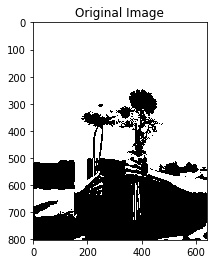

In [73]:
img[img >= 127] = 255
img[img <  127] = 0

plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.show()

In [69]:
def replace(img):
    ret = np.array(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            ret[i,j] = 255 if img[i,j] == 0  else 0
    return ret

In [80]:
def dilation(img):
    dil = np.zeros(img.shape)
    elem = np.array([[1,1],[1,1]])
    img = replace(img)
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1] - 1):
            k = np.array(img[i:i+2,j:j+2]) * elem
            if np.sum(k) > 0:
                dil[i,j] = 255
            else:
                dil[i,j] = 0
    dil = replace(dil)
#     img = replace(img)
    return dil

In [82]:
def erosion(img):
    ero = np.zeros(img.shape)
    elem = np.array([[1,1],[1,1]])
    img = replace(img)
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1] - 1):
            k = np.array(img[i:i+2,j:j+2]) * elem
            if np.sum(k) == np.sum(elem) * 255:
                ero[i,j] = 255
            else:
                ero[i,j] = 0
    ero = replace(ero)
    return ero

## Output

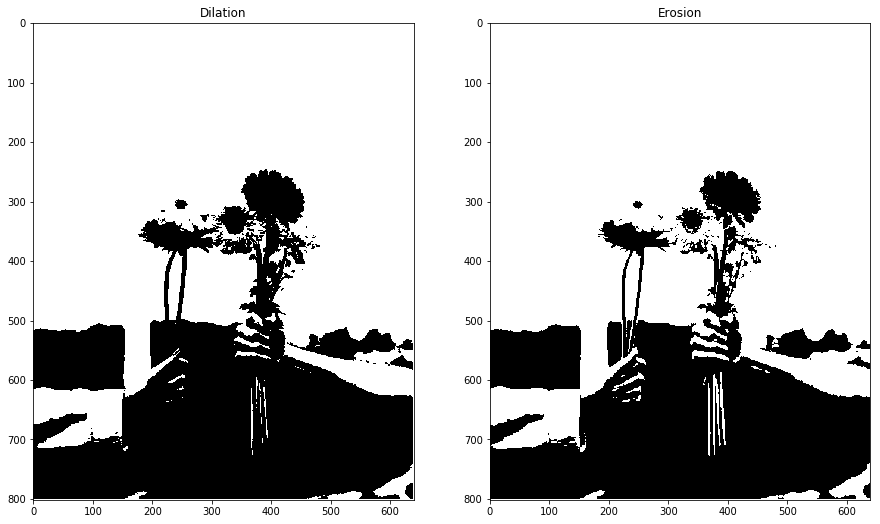

In [84]:
fig = plt.figure(figsize=(15, 10))

dil = dilation(img)
fig.add_subplot(121)
plt.imshow(dil, cmap="gray")
plt.title("Dilation")

ero = erosion(img)
fig.add_subplot(122)
plt.imshow(ero, cmap="gray")
plt.title("Erosion")

plt.show()

In [79]:
replace(dil)

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0., 255.],
       [  0.,   0.,   0., ..., 255.,   0., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])